<a href="https://colab.research.google.com/github/anvsm/HealthCare-Data-Analysis-/blob/main/Healthcare_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Mission is to analyse the dataset of Fortis General Hospital
## Prioritizing patient care in its operations.

## This dataset mainly focuses on 3 KPI's that are critical to hospital performance namely:

In [ ]:

## 1.Average Licensed Bed Occupancy rate:

## this is captured internally and as mesaured as average perecentage of beds that are occupied by patients

## Average Bed Occupancy rate = (Number of Patients in licensed beds per day/no.of licensed beds)*100

In [ ]:
## 2. Staff responsiveness top box score:

## This is a survey which is given to patients during their discharge which includes 2 major things:

## - During this hospital stay, after you pressed the call button how often did u get the call button as soon as u wanted it.
## - How often did u get help in getting to the bathroom or in using a bedpan as soon as you wanted.

## Staff responsiveness top box score =
## (Number of patients answering always to the staff responsiveness questions/Number of patients answering the two staff responsiveness questions)*100

In [ ]:
## 3. Unassisted Patient falls per 1000 patients a day

## This measure indicates an unplanned descent on the floor with or without injury.
## Unassisted falls are where there is no staff member present to assist the patient during the fall.

## Unassisted Fall Rate = (No.of Patient falls/No.of Patient days)*100

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [ ]:
data = pd.read_csv("Hospital_dataset.csv")

In [ ]:
data.head()

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,Jan-20,96%,2.21,68.34,0.221,0.6834,65
1,Feb-20,96%,1.79,72.75,0.179,0.7275,65
2,Mar-20,81%,1.03,67.07,0.103,0.6707,65
3,Apr-20,94%,1.97,71.21,0.197,0.7121,65
4,May-20,101%,3.41,57.68,0.341,0.5768,65


In [ ]:
print(data.columns)

Index(['Month', 'Average Licensed Bed  Occupancy Rate',
       'Unassisted Fall Rate per 1,000 Patient Days',
       'Staff Responsiveness Domain Top Box Score', 'Unassisted Fall %',
       'Staff Responsiveness Domain Top Box Score %',
       'Staff Responsiveness Top Box Score Benchmark'],
      dtype='object')


In [ ]:
data.head(3)

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,Jan-20,96%,2.21,68.34,0.221,0.6834,65
1,Feb-20,96%,1.79,72.75,0.179,0.7275,65
2,Mar-20,81%,1.03,67.07,0.103,0.6707,65


In [ ]:
## converting % percenatge columns to numeric

data["Average Licensed Bed  Occupancy Rate"] = data['Average Licensed Bed  Occupancy Rate'].str.rstrip('%').astype(float) / 100



In [ ]:
##data['Unassisted Fall %'] = data['Unassisted Fall %'].astype(float) / 100

In [ ]:
##data['Staff Responsiveness Domain Top Box Score %'] = data['Staff Responsiveness Domain Top Box Score %'].astype(float) / 100

In [ ]:
data.head(3)

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,Jan-20,0.96,2.21,68.34,0.221,0.6834,65
1,Feb-20,0.96,1.79,72.75,0.179,0.7275,65
2,Mar-20,0.81,1.03,67.07,0.103,0.6707,65


In [ ]:
## Getting the last 2 digits in month column

data['Month'] = data['Month'].astype(str).str[-2:]

In [ ]:
data

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,20,0.96,2.21,68.34,0.221,0.6834,65
1,20,0.96,1.79,72.75,0.179,0.7275,65
2,20,0.81,1.03,67.07,0.103,0.6707,65
3,20,0.94,1.97,71.21,0.197,0.7121,65
4,20,1.01,3.41,57.68,0.341,0.5768,65
5,20,0.98,2.61,67.86,0.261,0.6786,65
6,20,0.95,2.42,66.09,0.242,0.6609,65
7,20,0.94,2.09,70.38,0.209,0.7038,65
8,20,0.95,3.11,53.31,0.311,0.5331,65
9,20,0.92,1.60,67.55,0.160,0.6755,65


In [ ]:
data.head(3)

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,20,0.96,2.21,68.34,0.221,0.6834,65
1,20,0.96,1.79,72.75,0.179,0.7275,65
2,20,0.81,1.03,67.07,0.103,0.6707,65


In [ ]:
data.describe()


,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,0.962167,2.607833,63.087500,0.260783,0.630875,65.0
std,0.028409,0.500712,4.148518,0.050071,0.041485,0.0
min,0.810000,1.030000,53.310000,0.103000,0.533100,65.0
25%,0.950000,2.310000,60.342500,0.231000,0.603425,65.0
50%,0.960000,2.590000,63.620000,0.259000,0.636200,65.0
75%,0.980000,3.030000,65.992500,0.303000,0.659925,65.0
max,1.010000,3.410000,72.750000,0.341000,0.727500,65.0


In [ ]:
print(data.describe())

       Average Licensed Bed  Occupancy Rate  \
count                             60.000000   
mean                               0.962167   
std                                0.028409   
min                                0.810000   
25%                                0.950000   
50%                                0.960000   
75%                                0.980000   
max                                1.010000   

       Unassisted Fall Rate per 1,000 Patient Days  \
count                                    60.000000   
mean                                      2.607833   
std                                       0.500712   
min                                       1.030000   
25%                                       2.310000   
50%                                       2.590000   
75%                                       3.030000   
max                                       3.410000   

       Staff Responsiveness Domain Top Box Score  Unassisted Fall %  \
count             

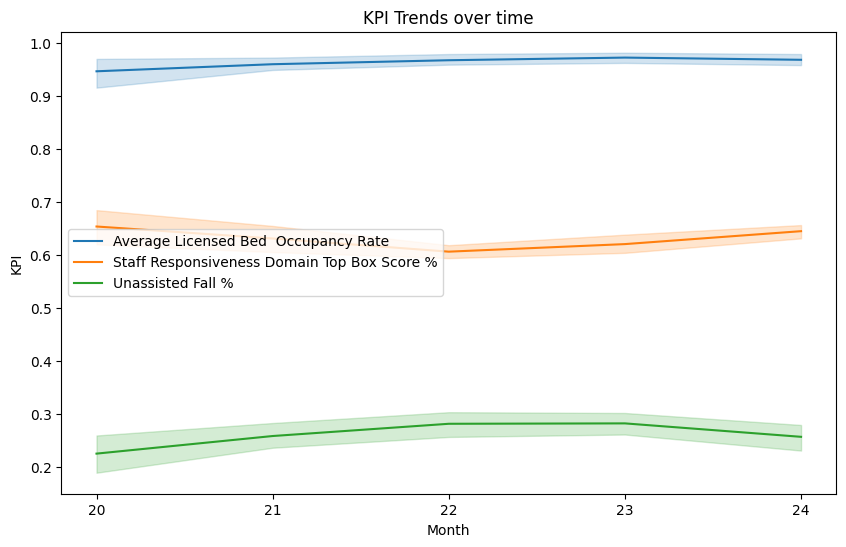

In [ ]:
## Visualizations

plt.figure(figsize = (10,6))
sns.lineplot(data = data, x= 'Month', y = 'Average Licensed Bed  Occupancy Rate', label ='Average Licensed Bed  Occupancy Rate')
sns.lineplot(data = data, x= 'Month', y = 'Staff Responsiveness Domain Top Box Score %', label ='Staff Responsiveness Domain Top Box Score %')
sns.lineplot(data = data, x= "Month", y = 'Unassisted Fall %', label = 'Unassisted Fall %')
plt.title("KPI Trends over time")
plt.xlabel('Month')
plt.ylabel('KPI')
plt.show()

In [ ]:
## Correlation Analysis

## 1. Pearsonr correlation for linear realtionships

pearson_corr_matrix = data[['Average Licensed Bed  Occupancy Rate', 'Staff Responsiveness Domain Top Box Score %', 'Unassisted Fall %']].corr(method = 'pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr_matrix)

Pearson Correlation Matrix:
                                             Average Licensed Bed  Occupancy Rate  \
Average Licensed Bed  Occupancy Rate                                     1.000000   
Staff Responsiveness Domain Top Box Score %                             -0.371821   
Unassisted Fall %                                                        0.700112   

                                             Staff Responsiveness Domain Top Box Score %  \
Average Licensed Bed  Occupancy Rate                                           -0.371821   
Staff Responsiveness Domain Top Box Score %                                     1.000000   
Unassisted Fall %                                                              -0.791340   

                                             Unassisted Fall %  
Average Licensed Bed  Occupancy Rate                  0.700112  
Staff Responsiveness Domain Top Box Score %          -0.791340  
Unassisted Fall %                                     1.000000  


In [ ]:
## 2. spearmanr correlation matrix for monotonic relationship

spearman_corr_matrix =data[['Average Licensed Bed  Occupancy Rate', 'Staff Responsiveness Domain Top Box Score %', 'Unassisted Fall %']].corr(method = 'spearman')
print("Spearman Correlation Matrix:")
print(spearman_corr_matrix)

Spearman Correlation Matrix:
                                             Average Licensed Bed  Occupancy Rate  \
Average Licensed Bed  Occupancy Rate                                     1.000000   
Staff Responsiveness Domain Top Box Score %                             -0.449558   
Unassisted Fall %                                                        0.619186   

                                             Staff Responsiveness Domain Top Box Score %  \
Average Licensed Bed  Occupancy Rate                                           -0.449558   
Staff Responsiveness Domain Top Box Score %                                     1.000000   
Unassisted Fall %                                                              -0.836393   

                                             Unassisted Fall %  
Average Licensed Bed  Occupancy Rate                  0.619186  
Staff Responsiveness Domain Top Box Score %          -0.836393  
Unassisted Fall %                                     1.000000  


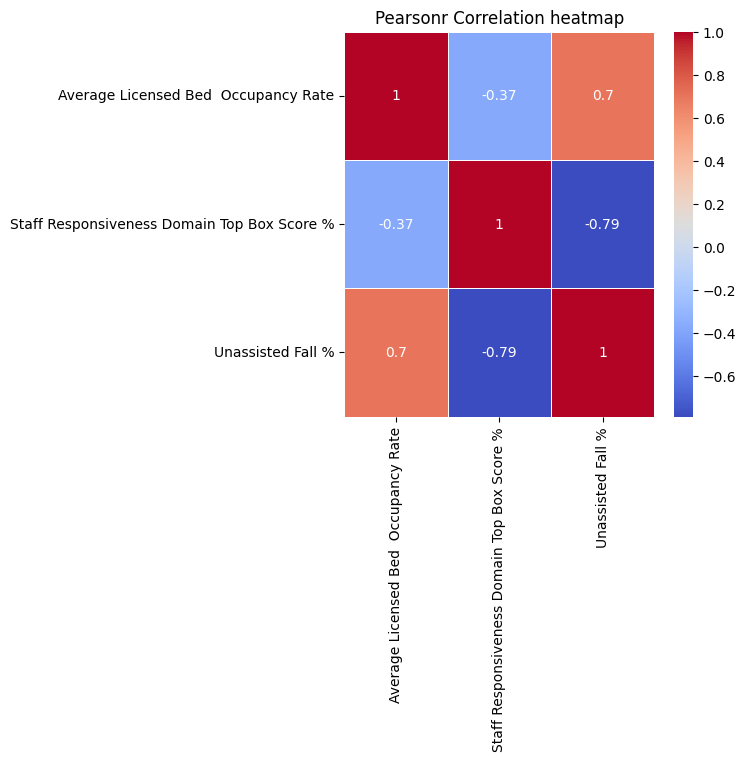

In [ ]:
## Visualizing the correlation matrices using heatmaps

plt.figure(figsize=(5,5))
sns.heatmap(pearson_corr_matrix, annot = True, cmap = 'coolwarm', linewidths= 0.5)
plt.title('Pearsonr Correlation heatmap')
plt.show()

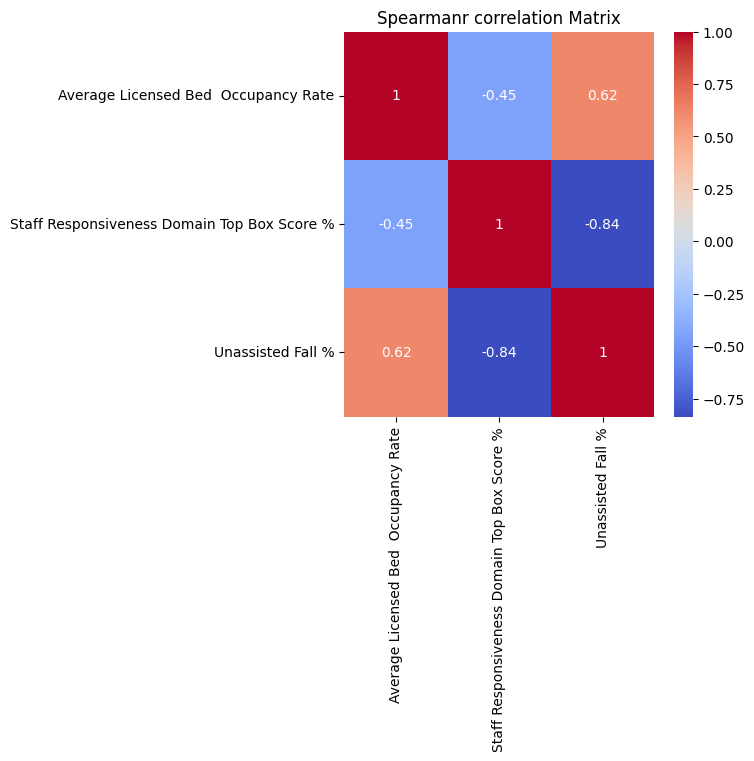

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(spearman_corr_matrix, annot = True, cmap = 'coolwarm')
plt.title("Spearmanr correlation Matrix")
plt.show()

In [ ]:
## Define the concise correlation in a table

correlation_status = {"Correlation Value Range" : ['1.0', '0.8 to 1.0', '0.5 to 0.8', '0.2 to 0.5', '0 to 0.2',
                                                     '-0.2 to 0', '-0.5 to -0.2', '-0.8 to -0.5', '-1.0 to -0.8', '-1.0'],
                       "Correlation_strength" :  ['Perfect Positive', 'Strong Positive', 'Moderate Positive', 'Weak Positive', 'Very Weak/No Correlation',
                                                   'Very Weak/Negative Correlation', 'Weak Negative', 'Moderate Negative', 'Strong Negative', 'Perfect Negative']
                      }

In [ ]:
## Creating a dataframe for the above

correlation_status_df = pd.DataFrame(correlation_status)

In [ ]:
correlation_status_df

,Correlation Value Range,Correlation_strength
0,1.0,Perfect Positive
1,0.8 to 1.0,Strong Positive
2,0.5 to 0.8,Moderate Positive
3,0.2 to 0.5,Weak Positive
4,0 to 0.2,Very Weak/No Correlation
5,-0.2 to 0,Very Weak/Negative Correlation
6,-0.5 to -0.2,Weak Negative
7,-0.8 to -0.5,Moderate Negative
8,-1.0 to -0.8,Strong Negative
9,-1.0,Perfect Negative
